<a href="https://colab.research.google.com/github/sabrinamarrocos/analise-airbnb/blob/main/analise_airbnb_ny.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df_airbnb_inside = pd.read_csv("/content/listings.csv.gz", compression="gzip")
df_answer_the_public = pd.read_csv("/content/airbnb-en-us-suggestions-18-09-2025.csv")
df_google_trends2025 = pd.read_csv("/content/multiTimeline_limpo.csv")

In [ ]:
df_google_trends2025.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39 entries, 0 to 38
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Semana                39 non-null     object
 1   airbnb (New York NY)  39 non-null     object
dtypes: object(2)
memory usage: 756.0+ bytes


In [ ]:
df_google_trends2025 = df_google_trends2025[pd.to_numeric(df_google_trends2025['airbnb (New York NY)'], errors='coerce').notnull()]
df_google_trends2025['airbnb (New York NY)'] = df_google_trends2025['airbnb (New York NY)'].astype(int)

In [ ]:
df_google_trends2025.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38 entries, 1 to 38
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Semana                38 non-null     object
 1   airbnb (New York NY)  38 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 912.0+ bytes


In [ ]:
df_google_trends2025.columns = ["Semana", "Pesquisas"]

In [ ]:
soma_google = df_google_trends2025["Pesquisas"].sum()
media_google = df_google_trends2025["Pesquisas"].mean()
maximo_google = df_google_trends2025["Pesquisas"].max()
minimo_google = df_google_trends2025["Pesquisas"].min()
print(f"A soma de pessoas que pesquisaram sobre 'Airbnb' no Google em 2025, até o momento, é de {soma_google} pessoas, sendo a média de {media_google:.2f} pessoas")
print(f"A maior quantidade de pesquisas sobre 'Airbnb' no Google em 2025, até o momento é de {maximo_google} e o mínimo {minimo_google}")

A soma de pessoas que pesquisaram sobre 'Airbnb' no Google em 2025, até o momento, é de 2746 pessoas, sendo a média de 72.26 pessoas
A maior quantidade de pesquisas sobre 'Airbnb' no Google em 2025, até o momento é de 100 e o mínimo 58


In [ ]:
melhores_semanas = df_google_trends2025['Pesquisas'] > 80

In [ ]:
df_google_trends2025[melhores_semanas]

,Semana,Pesquisas
25,2025-06-15,83
26,2025-06-22,83
27,2025-06-29,82
28,2025-07-06,81
29,2025-07-13,84
30,2025-07-20,100
31,2025-07-27,85
33,2025-08-10,83


In [ ]:
max_semana = df_google_trends2025['Pesquisas'] == 100

In [ ]:
df_filtrado_semanas = df_google_trends2025[melhores_semanas]

In [ ]:
import matplotlib.pyplot as plt

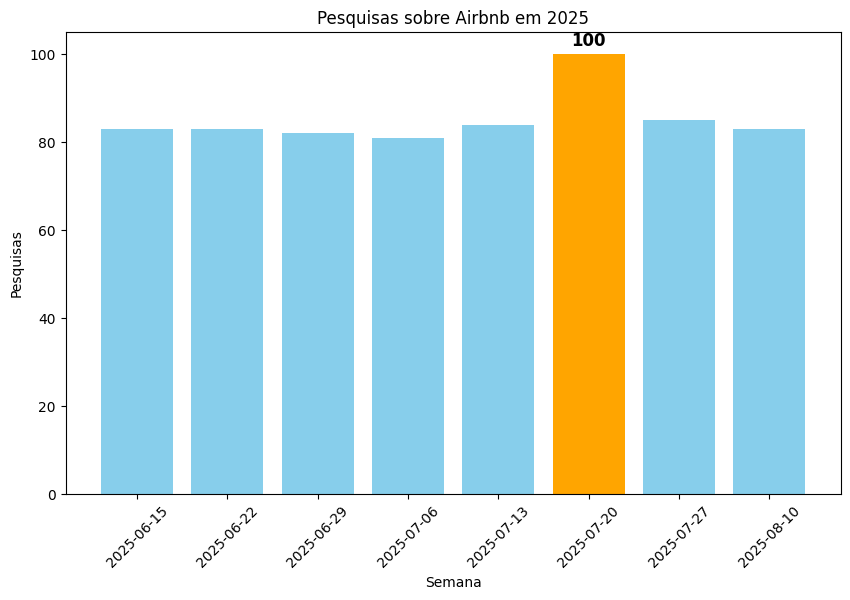

In [ ]:
import matplotlib.pyplot as plt

max_idx = df_filtrado_semanas['Pesquisas'].idxmax()
cores = ['skyblue' if i != max_idx else 'orange' for i in df_filtrado_semanas.index]

plt.figure(figsize=(10, 6))
plt.bar(df_filtrado_semanas['Semana'], df_filtrado_semanas['Pesquisas'], color=cores)
plt.xticks(rotation=45)
plt.xlabel('Semana')
plt.ylabel('Pesquisas')
plt.title('Pesquisas sobre Airbnb em 2025')

valor_max = df_filtrado_semanas.loc[max_idx, 'Pesquisas']
semana_max = df_filtrado_semanas.loc[max_idx, 'Semana']
plt.text(semana_max, valor_max + 1, str(valor_max), ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.show()


In [ ]:
df_answer_the_public.head()

,Tipo de modificador,Modificador,Sugestão,Idioma,Localização,Palavra-chave,Volume de buscas,Custo por clique
0,Perguntas,are,are airbnb safe,en,us,airbnb,720,0.0
1,Perguntas,are,are airbnb legal in nyc,en,us,airbnb,260,3.04
2,Perguntas,are,are airbnb and vrbo the same,en,us,airbnb,110,13.72
3,Perguntas,are,are airbnb and vrbo owned by the same company,en,us,airbnb,170,0.0
4,Perguntas,are,are airbnb allowed to have cameras,en,us,airbnb,390,3.5


In [ ]:
df_answer_the_public.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Tipo de modificador  30 non-null     object
 1   Modificador          30 non-null     object
 2   Sugestão             30 non-null     object
 3   Idioma               30 non-null     object
 4   Localização          30 non-null     object
 5   Palavra-chave        30 non-null     object
 6   Volume de buscas     30 non-null     object
 7   Custo por clique     30 non-null     object
dtypes: object(8)
memory usage: 2.0+ KB


In [58]:
df_answer_the_public = df_answer_the_public[pd.to_numeric(df_answer_the_public['Volume de buscas'], errors='coerce').notnull()]
df_answer_the_public['Volume de buscas'] = df_answer_the_public['Volume de buscas'].astype(int)

In [59]:
df_answer_the_public.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, 0 to 29
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Tipo de modificador  27 non-null     object
 1   Modificador          27 non-null     object
 2   Sugestão             27 non-null     object
 3   Idioma               27 non-null     object
 4   Localização          27 non-null     object
 5   Palavra-chave        27 non-null     object
 6   Volume de buscas     27 non-null     int64 
 7   Custo por clique     27 non-null     object
dtypes: int64(1), object(7)
memory usage: 1.9+ KB


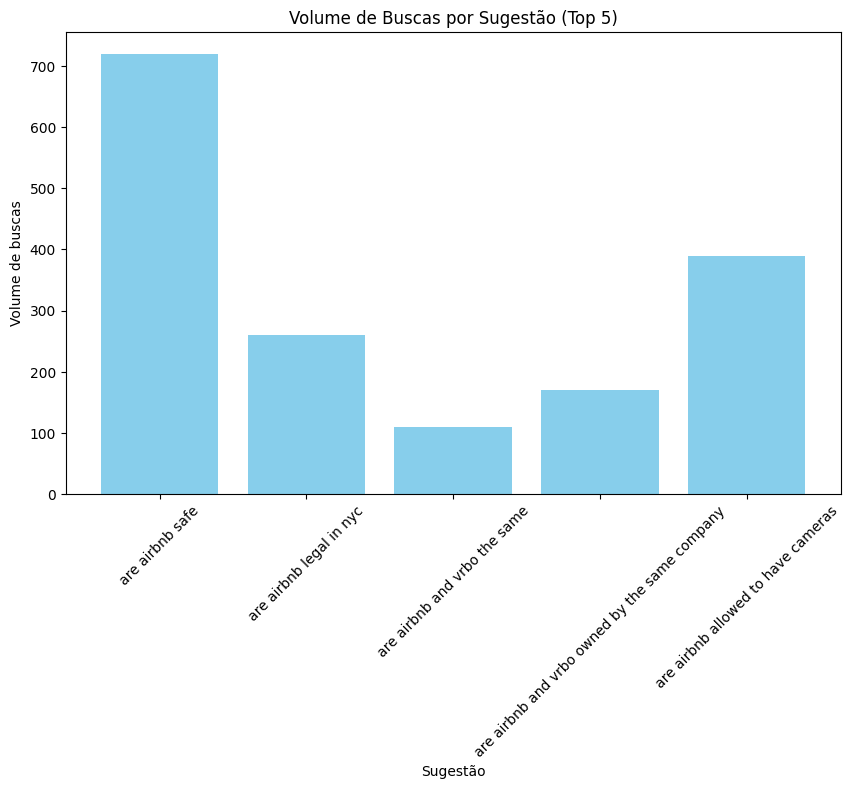

In [60]:
df_plot = df_answer_the_public.head(5)

plt.figure(figsize=(10, 6))
plt.bar(df_plot['Sugestão'], df_plot['Volume de buscas'], color='skyblue')
plt.xlabel('Sugestão')
plt.ylabel('Volume de buscas')
plt.title('Volume de Buscas por Sugestão (Top 5)')
plt.xticks(rotation=45)
plt.show()

In [62]:
pd.set_option('display.max_columns', None)
df_airbnb_inside.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,availability_eoy,number_of_reviews_ly,estimated_occupancy_l365d,estimated_revenue_l365d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2539,https://www.airbnb.com/rooms/2539,20250801203054,2025-08-03,city scrape,Superfast Wi-Fi. Clean & quiet home by the park,"Bright, serene room in a renovated apartment h...",Close to Prospect Park and Historic Ditmas Park,https://a0.muscache.com/pictures/hosting/Hosti...,2787,https://www.airbnb.com/users/show/2787,John,2008-09-07,"New York, NY",Educated professional living in Brooklyn. I l...,within an hour,100%,79%,f,https://a0.muscache.com/im/pictures/user/User/...,https://a0.muscache.com/im/pictures/user/User/...,Gravesend,6.0,13.0,"['email', 'phone']",t,t,Neighborhood highlights,Kensington,Brooklyn,40.64529,-73.97238,Private room in condo,Private room,2,1.0,1 shared bath,1.0,1.0,"[""Blender"", ""Microwave"", ""Dining table"", ""Clot...",$260.00,30,730,30.0,30.0,730.0,730.0,30.0,730.0,NaN,t,30,60,90,365,2025-08-03,9,0,0,151,0,0,0.0,2015-12-04,2018-10-19,4.89,4.88,5.00,5.00,5.00,4.75,4.88,NaN,f,6,1,5,0,0.08
1,2595,https://www.airbnb.com/rooms/2595,20250801203054,2025-08-02,city scrape,Skylit Studio Oasis | Midtown Manhattan,Prime Midtown | Spacious 500 Sq Ft | Pyramid S...,Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/hosting/Hosti...,2845,https://www.airbnb.com/users/show/2845,Jennifer,2008-09-09,"Woodstock, NY",A New Yorker since 2000! My passion is creatin...,within a day,90%,25%,f,https://a0.muscache.com/im/pictures/user/50fc5...,https://a0.muscache.com/im/pictures/user/50fc5...,Midtown,7.0,9.0,"['email', 'phone', 'work_email']",t,t,Neighborhood highlights,Midtown,Manhattan,40.75356,-73.98559,Entire rental unit,Entire home/apt,1,1.0,1 bath,0.0,1.0,"[""Ethernet connection"", ""Self check-in"", ""Hot ...",$240.00,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,NaN,t,30,60,90,365,2025-08-02,47,0,0,152,0,0,0.0,2009-11-21,2022-06-21,4.68,4.73,4.63,4.77,4.80,4.81,4.40,NaN,f,3,3,0,0,0.25
2,6848,https://www.airbnb.com/rooms/6848,20250801203054,2025-08-03,city scrape,Only 2 stops to Manhattan studio,Comfortable studio apartment with super comfor...,NaN,https://a0.muscache.com/pictures/e4f031a7-f146...,15991,https://www.airbnb.com/users/show/15991,Allen,2009-05-06,"New York, NY",We love to travel. When we travel we like to s...,within an hour,100%,100%,t,https://a0.muscache.com/im/users/15991/profile...,https://a0.muscache.com/im/users/15991/profile...,Williamsburg,1.0,1.0,"['email', 'phone']",t,t,NaN,Williamsburg,Brooklyn,40.70935,-73.95342,Entire rental unit,Entire home/apt,3,1.0,1 bath,2.0,1.0,"[""Microwave"", ""Hot water"", ""Hair dryer"", ""Wash...",$98.00,30,120,30.0,30.0,120.0,120.0,30.0,120.0,NaN,t,1

In [64]:
df_airbnb_inside['host_location'].value_counts()

,count
host_location,
"New York, NY",21735
"New York, United States",2968
United States,340
"Dubai, United Arab Emirates",338
"Los Angeles, CA",275
...,...
"Delhi, India",1
"Madison, MS",1
"Petropavlovsk-Kamchatskiy, Russia",1


In [78]:
filtro_ny = df_airbnb_inside[df_airbnb_inside['host_location'] == 'New York, NY']
acomodacoes_ny = filtro_ny['room_type'].value_counts()
print(acomodacoes_ny)

room_type
Entire home/apt    12159
Private room        9383
Shared room          154
Hotel room            39
Name: count, dtype: int64


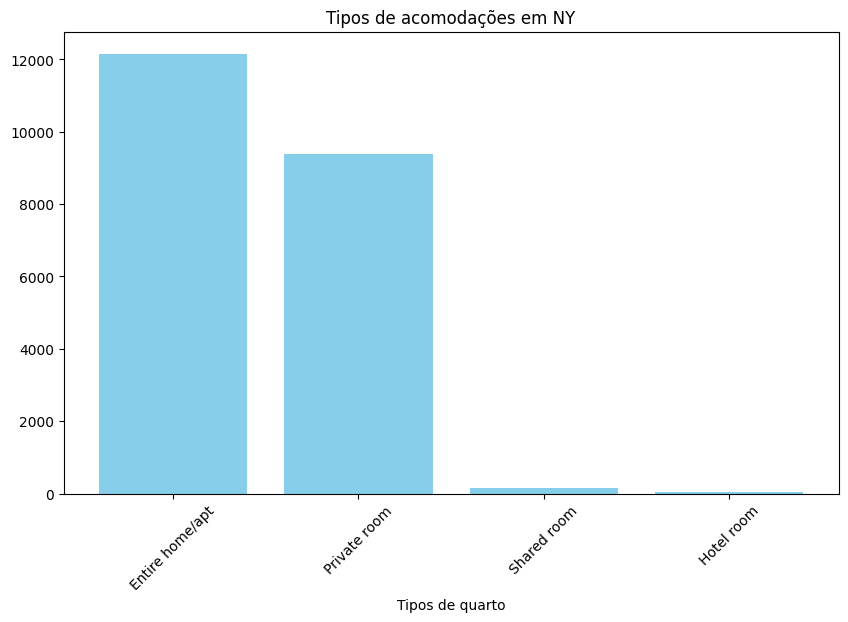

In [81]:
plt.figure(figsize=(10, 6))
plt.bar(acomodacoes_ny.index, acomodacoes_ny.values, color='skyblue')
plt.xlabel('Tipos de quarto')
plt.title('Tipos de acomodações em NY')
plt.xticks(rotation=45)
plt.show()